In [1]:
# This code imports the data you generated before for replicating.
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

stock_prices = pd.read_csv('stock_prices.csv')
stock_prices = stock_prices.set_index('timestamp')

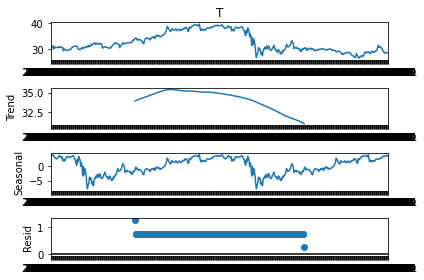

In [2]:
seasonal_decompose(stock_prices['T'], 
                   model = 'additive', 
                   period = int(len(stock_prices)/2)).plot();# period is the number of cycles which you expect to be in the data.

Well, now we have three components of the time series. The first plot represents the behavior of raw data and the rest three plots exhibits the trend, seasonality, and residuals.

Let me briefly discuss the additive model with a period of 360. In time series, multiplicative model works well if the amplitude of both the seasonal and irregular variations increase as the level of the trend rises. Alternatively, additive model is suitable when the amplitude of both the seasonal and irregular variations do not change as the level of the trend rises or falls.

In `seasonal_decompose` library, we need to identify the period as long as we do not have timeseries index. Given the period of the data, the parameter period changes. For instance, if the data period is daily, then period becomes 360 and if the data period is monthly, the period takes the value of 12.

First, I decompose the time series analysis and it turns out trend is not clear for AT&T and similar story holds for Verizon, too.

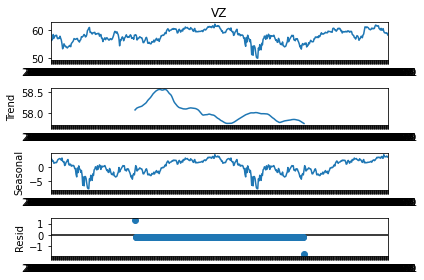

In [3]:
seasonal_decompose(stock_prices['VZ'], 
                   model='additive', 
                   period = int(len(stock_prices)/2)).plot();

On the contrary, the trend in Verizon is obvious and upward. As for the seasonality, it is hard to tell with same certainty. There is ups and downs but it is not periodic, which is an essential feature to have seasonality.

Another strong tools in detecting trend and seasonality are autocorrelation function and partial autocorrelation function. Let's start off with autocorrelation function.

Autocorrelation function, known as `ACF`, is a statistical tool to analyze the relationship between current value of a time series and its lagged values. Graphing ACF enables us to readily observe the serial dependence in a time series.

The vertical lines in autocorrelation function plot represent the correlation coefficients, the first line denotes the correlation of the series with its 0 lag, i.e., it is the correlation with itself. The second line indicates the correlation between series value at time t-1 and t. 

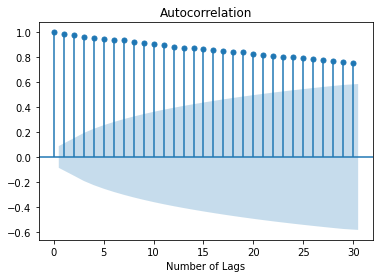

In [4]:
sm.graphics.tsa.plot_acf(stock_prices['T'],lags=30)
plt.xlabel('Number of Lags')
plt.show()

ACF confirms that there is a trend in AT&T in that the correlations decay very slowly. In a data with no trend, immediate decaying in correlation is something that we observe. Likewise, acf shows no presence of seasonality as no periodic ups and downs are observed.

The blue line in the acf plot denotes the confidence interval. If the correlation coefficient lies above or below the confidence interval, it means that null hypothesis stating no autocorrelation is rejected. Alternatively, if the correlation coefficient lies within the confidence band, it amounts to no autocorrelation.

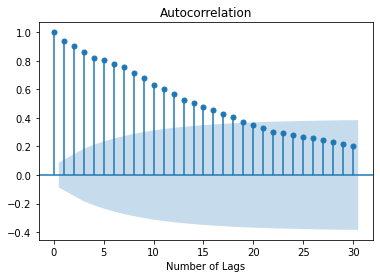

In [5]:
sm.graphics.tsa.plot_acf(stock_prices['VZ'],lags=30)
plt.xlabel('Number of Lags')
plt.show()

In the same vein, acf plot drawn for Verizon shows a strong sign of trend. In addition to that, it appears that seasonality does not exist, too.

Please refer to this website for more information about acf [acf-penn state](https://online.stat.psu.edu/stat462/node/188)

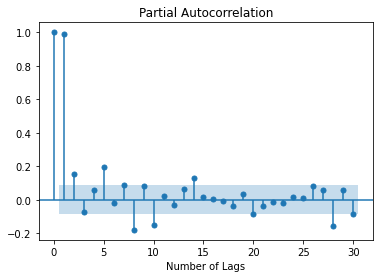

In [6]:
sm.graphics.tsa.plot_pacf(stock_prices['T'],lags=30)
plt.xlabel('Number of Lags')
plt.savefig('pacf_T.png')
plt.show()

Partial Autocorrelation Function (PACF) is another method to examine the relation‐
ship between $X_t$ and $X_{t−p}$.

PACF provides information on correlation between current value of a time series and its lagged values controlling for the other correlations.

In interpreting the PACF, as in ACF, you should focus on the spikes outside the dark region representing confidence interval. Following figure exhibits some spikes at lag 1, 2, 5, 8, 10, 14, and 28 are outside the region.

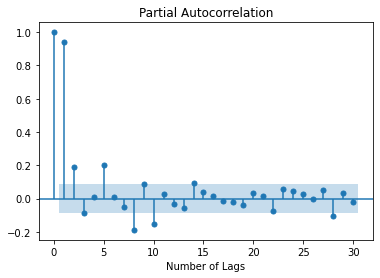

In [7]:
sm.graphics.tsa.plot_pacf(stock_prices['VZ'],lags=30)
plt.xlabel('Number of Lags')
plt.savefig('pacf_VZ.png')
plt.show()

PACF plot basically exhibits that many observations are within the confidence interval. Other than that, there are some spikes but it does not imply seasonality both for Verizon and AT&T.